# Building a Regression MLP Using the Sequential API

#### California Housing Problem using Neural Networks

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
# loading and splitting the dataset into train, valid and test set
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [13]:
# building the model
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

In [27]:
model.compile(loss=keras.losses.mean_squared_error, optimizer="sgd")

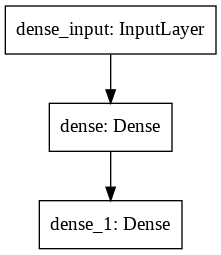

In [28]:
keras.utils.plot_model(model)

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3132 - val_loss: 0.3777
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3136 - val_loss: 0.3922
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3106 - val_loss: 0.3936
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3158 - val_loss: 0.3921
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3660 - val_loss: 0.3737
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3126 - val_loss: 0.3884
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3119 - val_loss: 0.3736
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3103 - val_loss: 0.3822
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3099 - val_loss: 0.3764
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3105 - val_loss: 0.3675

In [30]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3275


In [32]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.7697959],
       [1.769153 ],
       [2.6358202]], dtype=float32)